In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip

--2019-07-21 07:20:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8300005 (7.9M) [application/x-httpd-php]
Saving to: ‘superconduct.zip’

superconduct.zip    100%[===================>]   7.92M  8.55MB/s    in 0.9s    

2019-07-21 07:20:21 (8.55 MB/s) - ‘superconduct.zip’ saved [8300005/8300005]



In [0]:
!unzip superconduct.zip

Archive:  superconduct.zip
  inflating: unique_m.csv            
  inflating: train.csv               


In [0]:
data=pd.read_csv('train.csv')

In [0]:
data.count

<bound method DataFrame.count of        number_of_elements  mean_atomic_mass  ...  wtd_std_Valence  critical_temp
0                       4         88.944468  ...         0.437059          29.00
1                       5         92.729214  ...         0.468606          26.00
2                       4         88.944468  ...         0.444697          19.00
3                       4         88.944468  ...         0.440952          22.00
4                       4         88.944468  ...         0.428809          23.00
5                       4         88.944468  ...         0.410326          23.00
6                       4         88.944468  ...         0.349927          11.00
7                       4         76.517718  ...         0.444697          33.00
8                       4         76.517718  ...         0.440952          36.00
9                       4         76.517718  ...         0.437059          31.00
10                      4         76.517718  ...         0.428809          3

In [0]:
q=data['critical_temp']

In [0]:
q.shape

(21263,)

In [0]:
x=data.drop(['critical_temp'],axis=1).copy()
x=x.select_dtypes("int32","int64")

In [0]:
X_temp=x
for i in range(0,len(x.T)):
  X_temp.T.iloc[i]= X_temp.T.iloc[i]*(i+1)

In [0]:


def curve(m,x,c):
  return np.dot(m,x.T)+ c
def error(m,x,c,q):
  return np. mean((curve(m,x,c)-q)**2)
def derivative_slopes(m,x,c,q):
  arrow=(curve(m,x,c)-q)
  temp= 2*np.mean(np.multiply(arrow,x.T),axis=1)
  temp=np.array(temp)
  temp=np.reshape(temp,(1,len(temp)))
  return temp
  
def derivative_intercepts(m,x,c,q):
  arrow=(curve(m,x,c)-q)
  return 2* np.mean(arrow)
def accuracy_pred(error,q):
  currenterror=error(m,x,c,q)
  maxerror=np.mean(q**2)
  arrow=(currenterror/maxerror)*100
  return 100-arrow


In [0]:
q=q/q.max()
x=x/x.max()

In [0]:
data=data.dropna(axis=1)

error: 0.034282137721681184
accuracy: 50.24413794779111


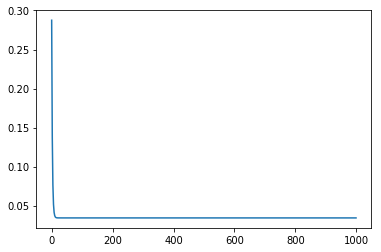

Text(0, 0.5, 'error')

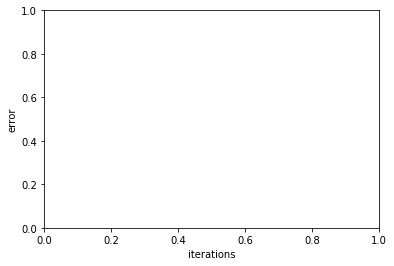

In [0]:
m =np.random.randn(len(x.T))
c = random.random()
cost=[]

lr=0.1
iterations=1000
for i in range(iterations):
  m = m-lr*derivative_slopes(m,x,c,q)
  c = c-lr* derivative_intercepts(m,x,c,q)
  cost.append(error(m,X_temp,c,q))
  clear_output(True)
  print("error:",error(m,x,c,q))
  print("accuracy:",accuracy_pred(error,q)) 
plt.plot(cost)  
plt.show()
plt.xlabel("iterations")
plt.ylabel("error")